In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np
import datetime
from os import listdir
from os.path import isfile, join
from matplotlib.backends.backend_pdf import PdfPages

#percorso = 'D:/Università/Tirocinio/Analisi Dati/Studio Dati/'
percorso = 'D:/Tirocinio/programmi/Studio Dati/'
onlyfiles = [f for f in listdir(f'{percorso}/risultati_terremoto/') if isfile(join(f'{percorso}/risultati_terremoto/', f))]
inizio = pd.to_datetime('20160801', format='%Y%m%d')
# Mancano 4 ore nel giorno 2016-08-16
fine = pd.to_datetime('20160915', format='%Y%m%d')
#comune = 'Macerata'

#coms = pd.Series(pd.read_csv('D:/Università/Tirocinio/Analisi Dati/Grezzo Niki/sezione2comuneDEF.csv').comune.unique(), name= 'Comune')
coms = pd.Series(pd.read_csv('D:/Tirocinio/programmi/Grezzo Niki/sezione2comuneDEF.csv').comune.unique(), name= 'Comune')
print(coms)
print(coms.iloc[23]) # il comune è None
#crateri = pd.read_csv('D:/Università/Tirocinio/Analisi Dati/Studio Dati/crateriCentroIT.csv', sep=';').merge(coms, how='outer').drop(columns='Provincia')
crateri = pd.read_csv('D:/Tirocinio/programmi/Studio Dati/crateriCentroIT.csv', sep=';').merge(coms, how='outer').drop(columns='Provincia')
crateri['Cratere Centro Italia 2016'].fillna('0', inplace=True)


0                Bibbiena
1      Chiusi della Verna
2              Verghereto
3             Casteldelci
4              Pennabilli
              ...        
658           Sante Marie
659           Roccacasale
660       Montorio Romano
661              Manziana
662                Celano
Name: Comune, Length: 663, dtype: object
None


24
stampo grafico Bibbiena
24
stampo grafico Chiusi della Verna
24
stampo grafico Verghereto
24
stampo grafico Casteldelci
24
stampo grafico Pennabilli
24
stampo grafico Carpegna
24
stampo grafico Frontino
24
stampo grafico Piandimeleto
24
stampo grafico Lunano
24
stampo grafico Sassocorvaro
24
stampo grafico Urbino
24
stampo grafico Petriano
24
stampo grafico Montefelcino
24
stampo grafico Serrungarina
24
stampo grafico Cartoceto
24


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\giord\anaconda3\envs\Earthquake\lib\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-363473f350c7>", line 15, in <module>
    esempio = pd.read_csv(f'{percorso}/risultati_terremoto/{i}', header=None)
  File "C:\Users\giord\anaconda3\envs\Earthquake\lib\site-packages\pandas\io\parsers.py", line 610, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "C:\Users\giord\anaconda3\envs\Earthquake\lib\site-packages\pandas\io\parsers.py", line 462, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "C:\Users\giord\anaconda3\envs\Earthquake\lib\site-packages\pandas\io\parsers.py", line 819, in __init__
    self._engine = self._make_engine(self.engine)
  File "C:\Users\giord\anaconda3\envs\Earthquake\lib\site-packages\pandas\io\parsers.py", line 1050, in _make_engine
    return mapping[engine](self.f, **self.optio

TypeError: object of type 'NoneType' has no len()

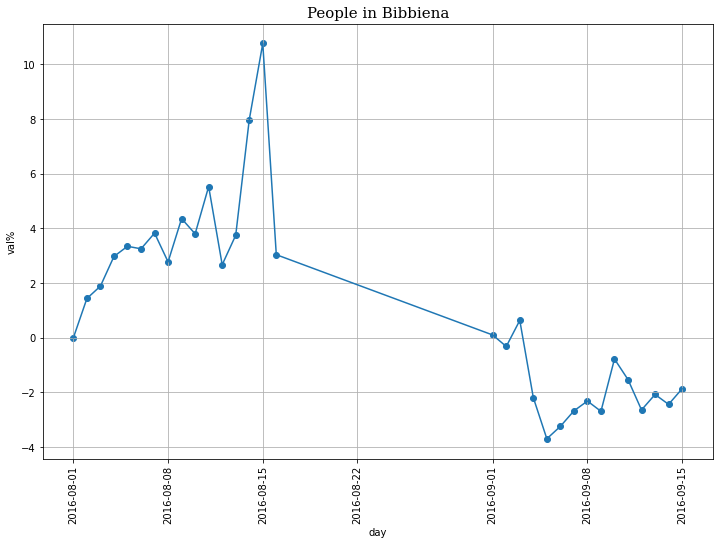

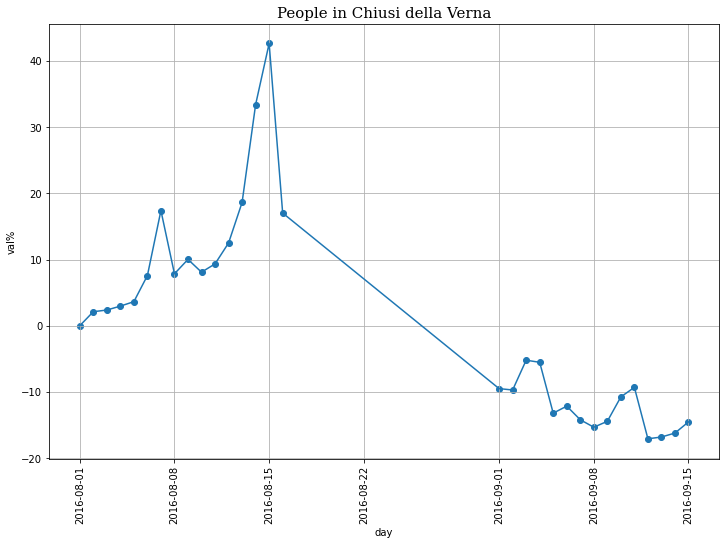

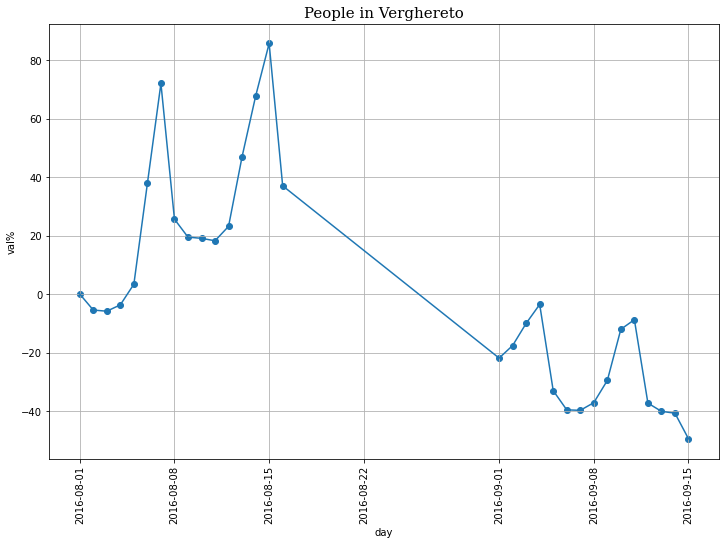

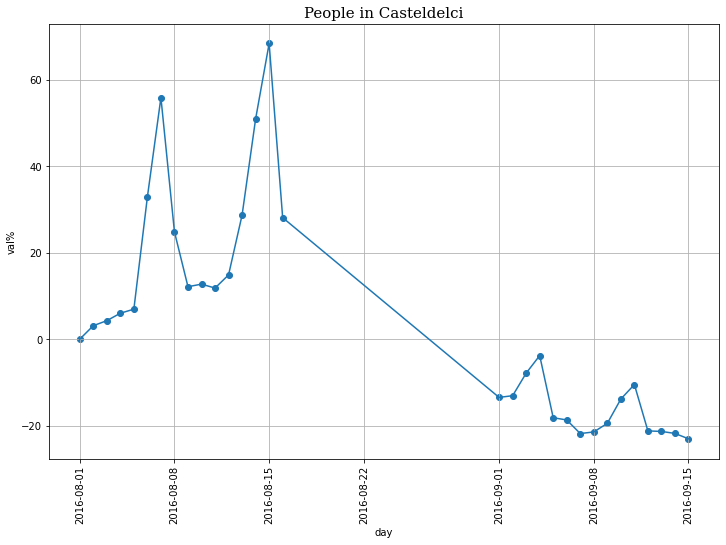

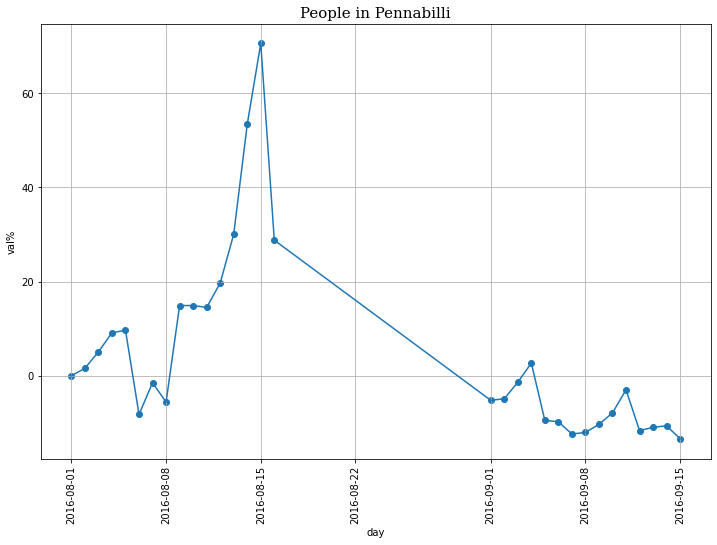

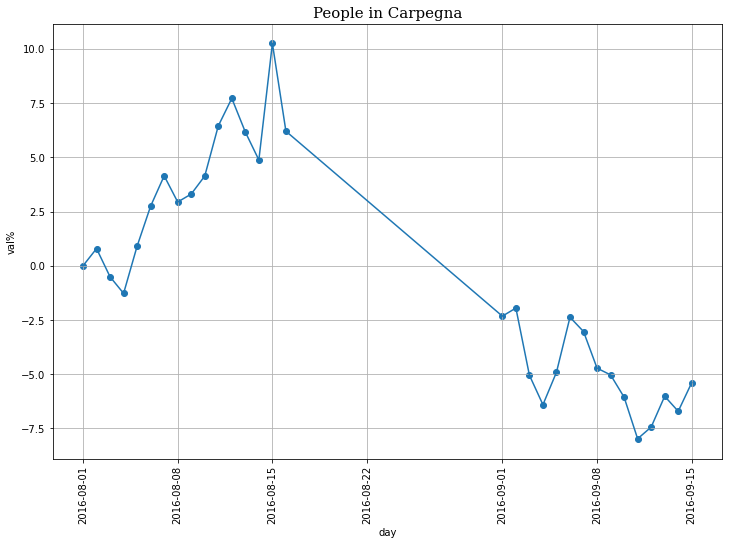

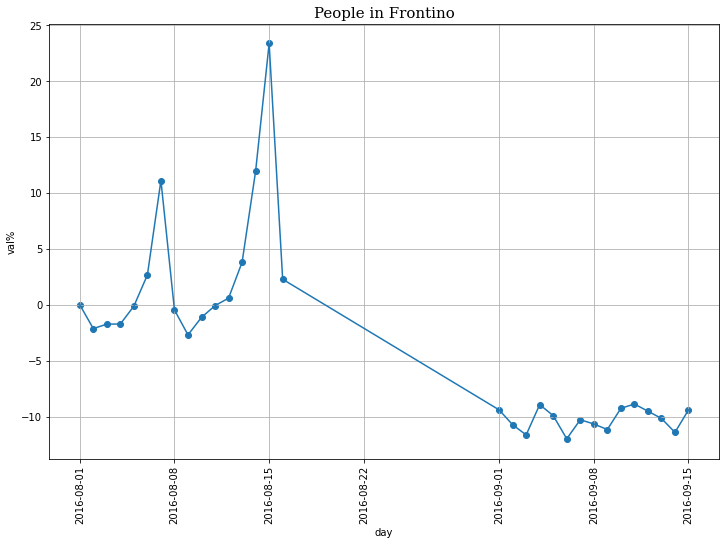

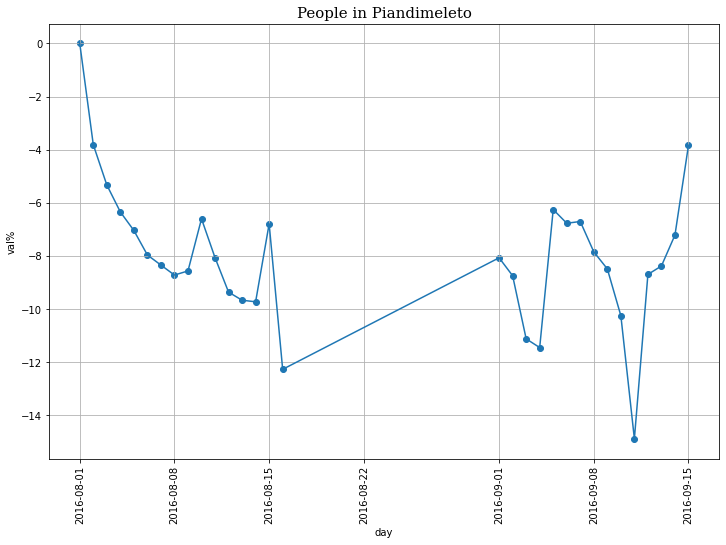

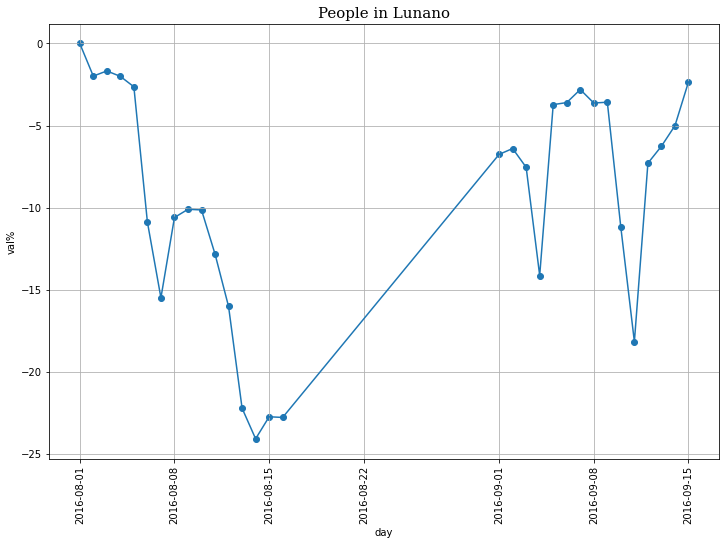

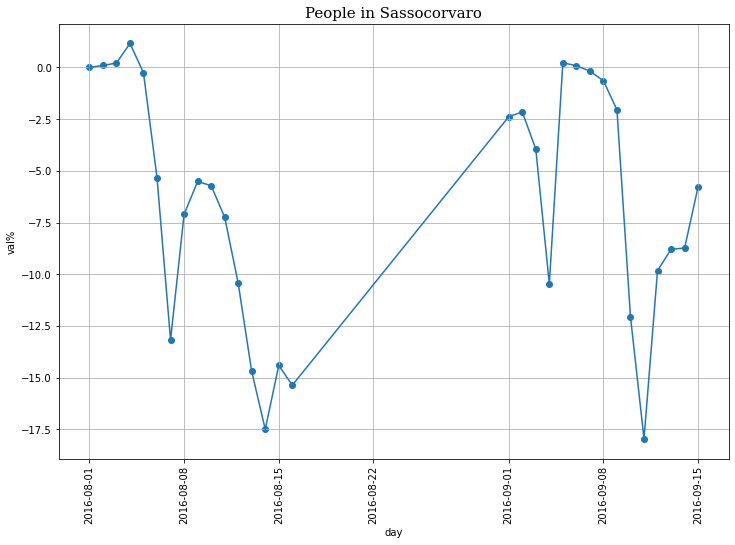

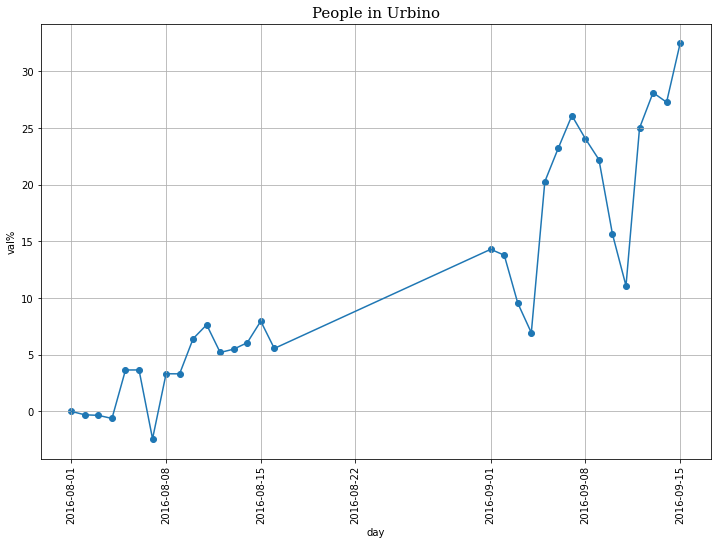

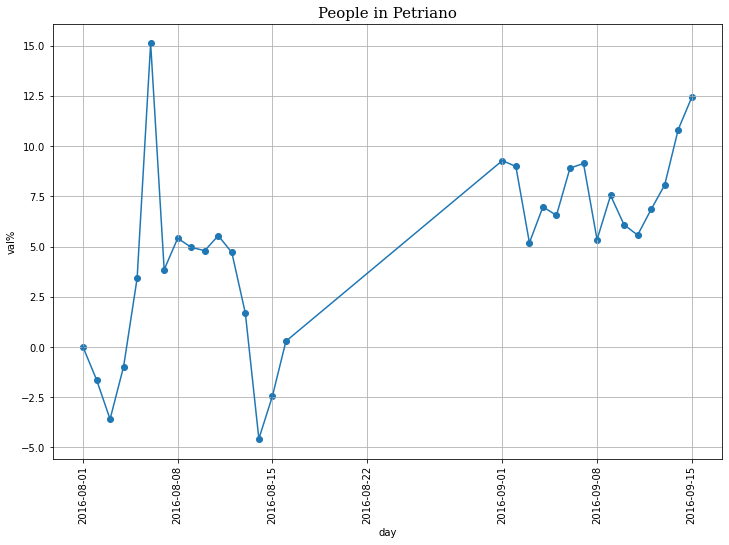

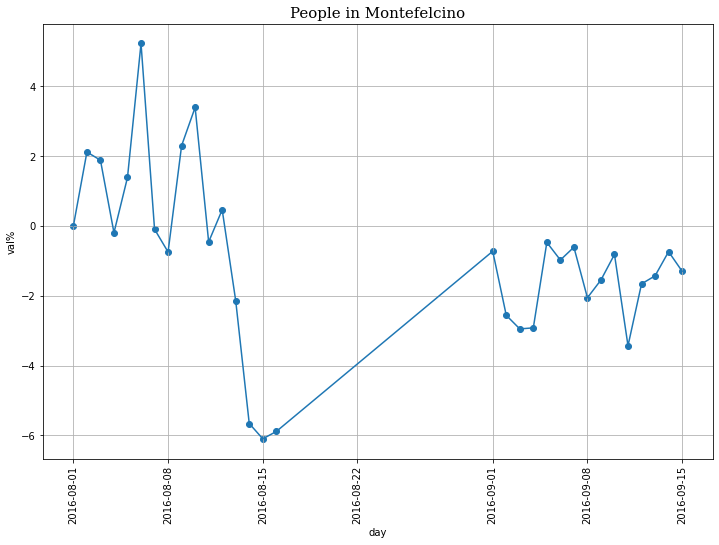

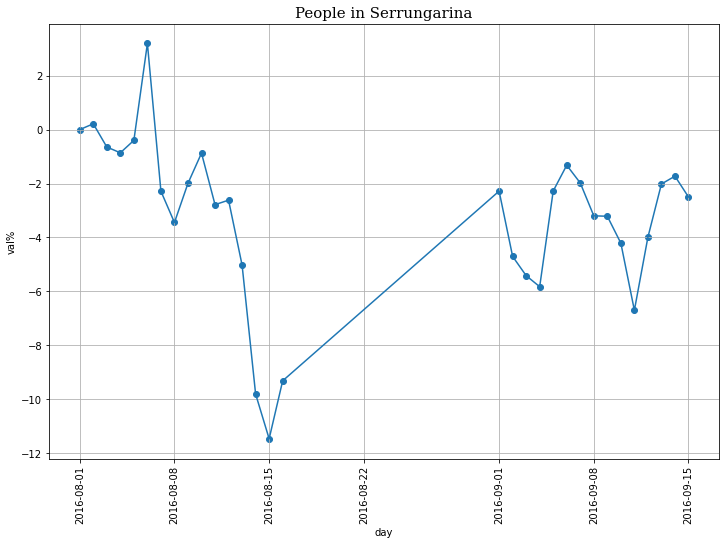

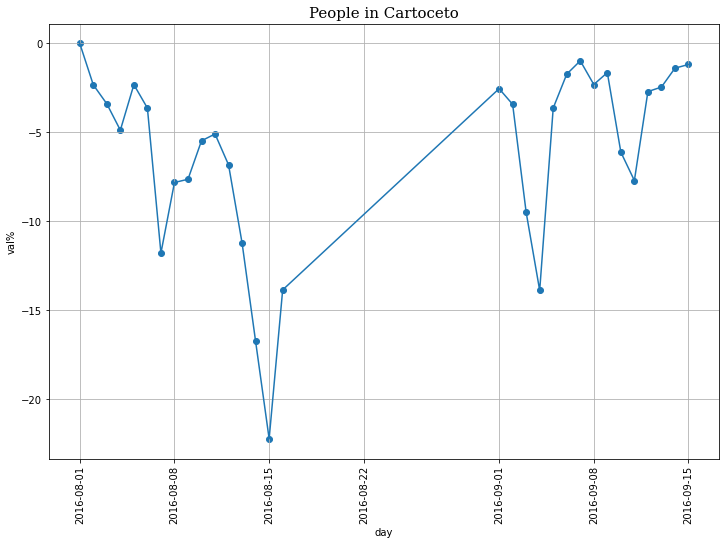

In [2]:
dfc = pd.read_csv(f'{percorso}/risultati_terremoto/CentroItalia_{inizio.strftime("%Y%m%d")}_{inizio.strftime("%Y%m")}30_24.csv', header=None)
dfc.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)
pp = PdfPages('Grafici popolazione centro Italia2.pdf')
for comune in coms:
    df = dfc.loc[dfc['Comune'] == comune]
    df = df.merge(crateri)
    df.rename(columns={'Cratere Centro Italia 2016': 'terremotata', 'Comune': 'comune'}, inplace=True)
    df['data'] = pd.to_datetime(dfc['data'], format='%Y%m%d_%H%M')
    print(df.comune.shape[0])

    for i in onlyfiles:
        giorno = pd.to_datetime(i.split('_')[1], format='%Y%m%d')
        if (giorno > inizio) and (giorno <= fine):

            esempio = pd.read_csv(f'{percorso}/risultati_terremoto/{i}', header=None)
            esempio.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)
            esempio = esempio.loc[esempio['Comune'] == comune]
            esempio = esempio.merge(crateri)
            esempio.rename(columns={'Cratere Centro Italia 2016': 'terremotata', 'Comune' : 'comune'}, inplace= True)
            esempio['data']= pd.to_datetime(esempio['data'], format='%Y%m%d_%H%M')
            df = pd.concat([df, esempio])

    df.data = df.data.dt.date
    df = df.groupby(['comune', 'data','terremotata']).aggregate('val').mean().reset_index()
    #print(df.comune)

    sedici = df.loc[df.data == pd.to_datetime('20160801', format='%Y%m%d').date()]['val']
    for i in range (len(df)):
        df.iloc[i,3] = (df.iloc[i, 3] - sedici)*100/ sedici
    print(f'stampo grafico {comune}' )

    def Fig(x,y):
        fig = plt.figure(figsize=(12,8))
        plt.subplot(3,2,1)
        plt.plot(df.data,df.val)
        plt.scatter(df.data, df.val)
        plt.xticks(rotation= 90)
        font1 = {'family':'serif','color':'black','size':15}
        plt.xlabel('day')
        plt.ylabel('val%')
        plt.title(f'People in {comune}', fontdict=font1)
        plt.grid()
        return fig

    fig = Fig(df.data, df.val)
# Mi printa anche i grafici

    pp.savefig(fig)
pp.close()

24
stampo grafico Macerata


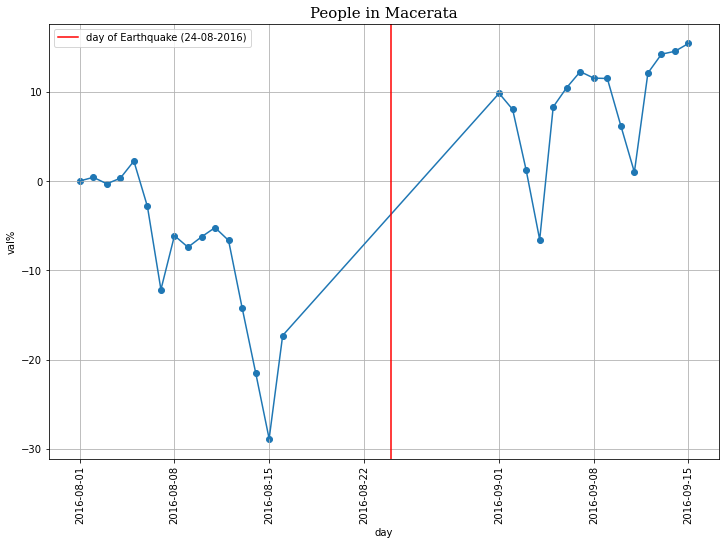

In [47]:
comune = 'Macerata'
dfc = pd.read_csv(f'{percorso}/risultati_terremoto/CentroItalia_{inizio.strftime("%Y%m%d")}_{inizio.strftime("%Y%m")}30_24.csv', header=None)
dfc.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)
df = dfc.loc[dfc['Comune'] == comune]
df = df.merge(crateri)
df.rename(columns={'Cratere Centro Italia 2016': 'terremotata', 'Comune': 'comune'}, inplace=True)
df['data'] = pd.to_datetime(dfc['data'], format='%Y%m%d_%H%M')
print(df.comune.shape[0])
for i in onlyfiles:
       giorno = pd.to_datetime(i.split('_')[1], format='%Y%m%d')
       if (giorno > inizio) and (giorno <= fine):

            esempio = pd.read_csv(f'{percorso}/risultati_terremoto/{i}', header=None)
            esempio.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)
            esempio = esempio.loc[esempio['Comune'] == comune]
            esempio = esempio.merge(crateri)
            esempio.rename(columns={'Cratere Centro Italia 2016': 'terremotata', 'Comune' : 'comune'}, inplace= True)
            esempio['data']= pd.to_datetime(esempio['data'], format='%Y%m%d_%H%M')
            df = pd.concat([df, esempio])

df.data = df.data.dt.date
df = df.groupby(['comune', 'data','terremotata']).aggregate('val').mean().reset_index()
#print(df.comune)
sedici = df.loc[df.data == pd.to_datetime('20160801', format='%Y%m%d').date()]['val']
for i in range (len(df)):
    df.iloc[i,3] = (df.iloc[i, 3] - sedici)*100/ sedici
print(f'stampo grafico {comune}' )
fig = plt.figure(figsize=(12,8))
plt.plot(df.data,df.val)
plt.scatter(df.data, df.val)
plt.xticks(rotation= 90)
font1 = {'family':'serif','color':'black','size':15}
plt.xlabel('day')
plt.ylabel('val%')
plt.title(f'People in {comune}', fontdict=font1)
plt.grid()
hq_time = terremoto = datetime.datetime(2016,8,24).date()
if df.data.min() < hq_time and hq_time < df.data.max():
    plt.axvline(hq_time, color = '#ff0000', label = 'day of Earthquake (24-08-2016)')
    plt.legend()

24
stampo grafico Bibbiena
1
24
stampo grafico Chiusi della Verna
2
24
stampo grafico Verghereto
3
24
stampo grafico Casteldelci
4
24
stampo grafico Pennabilli
5
24
stampo grafico Carpegna
6


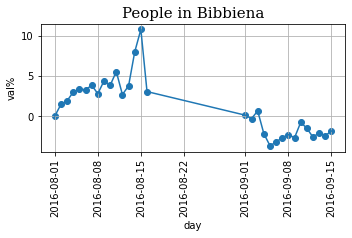

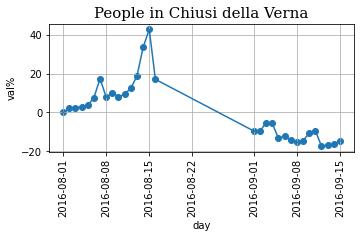

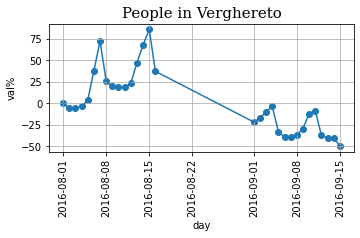

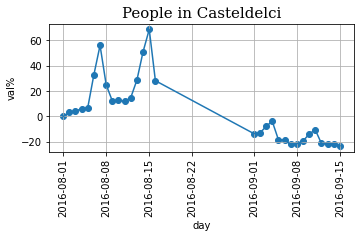

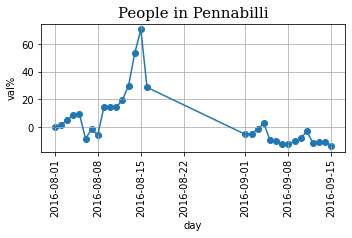

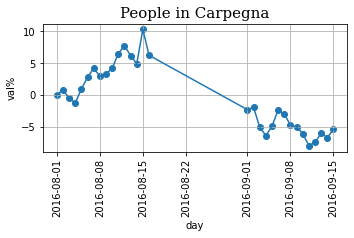

In [25]:
dfc = pd.read_csv(f'{percorso}/risultati_terremoto/CentroItalia_{inizio.strftime("%Y%m%d")}_{inizio.strftime("%Y%m")}30_24.csv', header=None)
dfc.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)
#pp = PdfPages('Grafici popolazione centro Italia7.pdf')
cnt=0
for comune in coms.head(6):
    df = dfc.loc[dfc['Comune'] == comune]
    df = df.merge(crateri)
    df.rename(columns={'Cratere Centro Italia 2016': 'terremotata', 'Comune': 'comune'}, inplace=True)
    df['data'] = pd.to_datetime(dfc['data'], format='%Y%m%d_%H%M')
    print(df.comune.shape[0])

    for i in onlyfiles:
        giorno = pd.to_datetime(i.split('_')[1], format='%Y%m%d')
        if (giorno > inizio) and (giorno <= fine):

            esempio = pd.read_csv(f'{percorso}/risultati_terremoto/{i}', header=None)
            esempio.rename(columns={0: 'Comune', 1: 'val', 2: 'data'}, inplace=True)
            esempio = esempio.loc[esempio['Comune'] == comune]
            esempio = esempio.merge(crateri)
            esempio.rename(columns={'Cratere Centro Italia 2016': 'terremotata', 'Comune' : 'comune'}, inplace= True)
            esempio['data']= pd.to_datetime(esempio['data'], format='%Y%m%d_%H%M')
            df = pd.concat([df, esempio])

    df.data = df.data.dt.date
    df = df.groupby(['comune', 'data','terremotata']).aggregate('val').mean().reset_index()
    #print(df.comune)

    sedici = df.loc[df.data == pd.to_datetime('20160801', format='%Y%m%d').date()]['val']
    for i in range (len(df)):
        df.iloc[i,3] = (df.iloc[i, 3] - sedici)*100/ sedici
    print(f'stampo grafico {comune}' )
    cnt += 1
    print(cnt)
    plt.figure(figsize=(12,8))
    plt.subplot(3,2,cnt)
    plt.plot(df.data,df.val)
    plt.scatter(df.data, df.val)
    plt.xticks(rotation= 90)
    font1 = {'family':'serif','color':'black','size':15}
    plt.xlabel('day')
    plt.ylabel('val%')
    plt.title(f'People in {comune}', fontdict=font1)
    plt.grid()
# Mi printa anche i grafici
    #cnt = 0
    if cnt == 2:
        plt.savefig('Grafici popolazione centro Italia9.pdf')
        #pp.savefig()
        #pp.close()
